# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data)

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

alldata = pd.read_csv('Data/titanic.csv')
alldata.shape

(891, 12)

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [44]:
alldata.columns
#891 rows, 12 columns
# PassengerId = numerial key
# Survival (0 = No; 1 = Yes)
# pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name 'FIRSTNAME, LASTNAME'
# sex             Sex 
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [92]:
#data = alldata.dropna()
averageages = pd.Series([alldata['Age'].mean(),
                        alldata[alldata['Survived']==1]['Age'].mean(),
                        alldata[(alldata['Pclass']==1) & (alldata['Survived']==0)]['Age'].mean(),
                        alldata[
        (alldata['Sex']=='male') & (alldata['Survived']==1) &(alldata['Embarked']!='Q') &
        (alldata['Age']>30)]['Age'].mean()]
                        )
averageages.index = ['Any Passenger',
                     'Survivor',
                     'Non-surviving First-class',
                     'Male survivor over 30 not from Queenstown']
averageages


Any Passenger                                29.699118
Survivor                                     28.343690
Non-surviving First-class                    43.695312
Male survivor over 30 not from Queenstown    41.487805
dtype: float64

**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [93]:
medianages = pd.Series([alldata['Age'].median(),
                        alldata[alldata['Survived']==1]['Age'].median(),
                        alldata[(alldata['Pclass']==1) & (alldata['Survived']==0)]['Age'].median(),
                        alldata[
        (alldata['Sex']=='male') & (alldata['Survived']==1) &(alldata['Embarked']!='Q') &
        (alldata['Age']>30)]['Age'].median()])

medianages.index = ['Any Passenger',
                     'Survivor',
                     'Non-surviving First-class',
                     'Male survivor over 30 not from Queenstown']
medianages

difference_in_ages =  averageages - medianages
difference_in_ages

Any Passenger                                1.699118
Survivor                                     0.343690
Non-surviving First-class                   -1.554688
Male survivor over 30 not from Queenstown    3.487805
dtype: float64

**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [68]:
alldata['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# 3rd class is most common

In [57]:
alldata['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Southampton is most common

In [56]:
alldata['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

# 0 is most common

**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [94]:
faredata = alldata['Fare']

In [95]:
faredata.std()

49.693428597180905

In [97]:
faredata.median()

14.4542

In [98]:
faredata.mean()

32.2042079685746

# 0-1

**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [100]:
faredata.quantile(0.9)-faredata.quantile(0.05)

70.7333

In [143]:
sortedfaredata = alldata.sort_values(['Fare'])
print(sortedfaredata.quantile(0.9)['Pclass'])
print(sortedfaredata.quantile(0.05)['Pclass'])

3.0
1.0


//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [134]:
pd.pivot_table(alldata,
    values= 'Fare',
    columns=['Embarked'])

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

# Cherbourg

**What is the most common passenger class for each port?**

In [135]:
pd.pivot_table(alldata,
               aggfunc= stats.mode,
               values='Pclass',
               columns=['Embarked'])

Embarked
C     ([1], [85])
Q     ([3], [72])
S    ([3], [353])
Name: Pclass, dtype: object

Queenstown - 3
Southampton - 3
Cherbourg - 1

**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [136]:
medianprice = faredata.median()
surviving_firstclass_males = alldata[(alldata['Pclass']==1) & 
                                     (alldata['Sex']=='male') & 
                                     (alldata['Survived']==1)]
paidlower = surviving_firstclass_males[surviving_firstclass_males['Fare'] < (2*medianprice)]
len(paidlower)/len(surviving_firstclass_males)

0.24444444444444444

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [141]:
surviving_with_family = alldata[
    (alldata['Survived']==1)&
    ((alldata['SibSp']>0)|(alldata['Parch']>0))]
non_surviving_without_family = alldata[
    (alldata['Survived']==0)&
    (alldata['SibSp']==0)&(alldata['Parch']==0)]
surviving_with_family['Age'].mean() - non_surviving_without_family['Age'].mean()

-6.888171076642337

**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

<function matplotlib.pyplot.show>

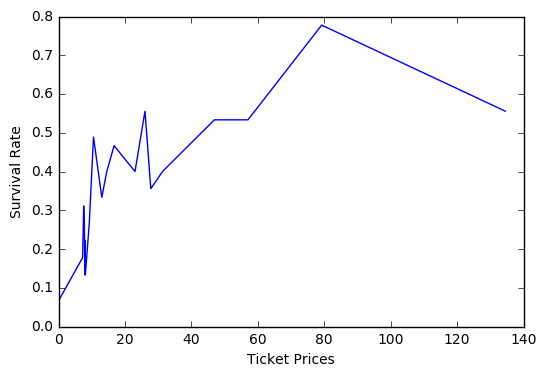

In [158]:
import math

n_quantiles = 20
n_passengers = len(sortedfaredata)
survival_rates = []
ticket_prices = []
len_quantile = math.ceil(n_passengers / n_quantiles) 
#Return the ceiling of x as a float, the smallest integer value greater than or equal to x.

for i in range(0,n_passengers,len_quantile):
    #get number of survivors in quantile
    end = (i + len_quantile -1) if (i + len_quantile) < n_passengers else (n_passengers - 1)
    quantile = sortedfaredata[i:end]
    n_survived = len(quantile[(quantile['Survived']==1)])
    survival_rates.append(n_survived / len_quantile)
    ticket_prices.append(sortedfaredata.iloc[i]['Fare'])
    
plt.plot(ticket_prices,survival_rates)
plt.xlabel('Ticket Prices')
plt.ylabel('Survival Rate')
plt.show
    
    


**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [160]:
medianlist = pd.Series([alldata['Age'].median(),
                        alldata['Fare'].median(),
                        alldata['SibSp'].median(),
                        alldata['Parch'].median()])

medianlist.index = ['Age',
                     'Fare',
                     'SibSp',
                     'Parch']
medianlist

Age      28.0000
Fare     14.4542
SibSp     0.0000
Parch     0.0000
dtype: float64

**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [184]:
def calculate_survival_ratio(series):
    return len(series[(series['Survived']==1)])/len(series)

below_at_med = pd.Series(name='Survived at/below med')
above_med = pd.Series(name='Survive above med')

for index, item in medianlist.iteritems():
    if medianlist[index]==0:
        below_at_med[index]=calculate_survival_ratio(alldata[(alldata[index]==medianlist[index])])
    else:
        below_at_med[index]=calculate_survival_ratio(alldata[(alldata[index]<medianlist[index])])
    above_med[index]=calculate_survival_ratio(alldata[(alldata[index]>medianlist[index])])

survivors = pd.DataFrame([below_at_med,above_med],columns =['Age','Fare','SibSp','Parch']).transpose()
difference = above_med - below_at_med
survivors['diff']=difference
survivors
    





,Survived at/below med,Survive above med,diff
Age,0.418398,0.403409,-0.014989
Fare,0.252273,0.518018,0.265745
SibSp,0.345395,0.466431,0.121036
Parch,0.343658,0.511737,0.168079


## Fare would draw the largest gap between the two groups of survivors/non-survivors

**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

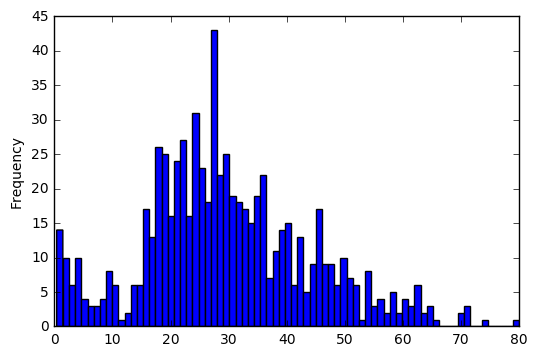

In [200]:
alldata['Age'].plot.hist(bins=75)

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old

In [202]:
def calculate_probability(condition):
    return (len(alldata[condition])/len(alldata))

probability = pd.Series(name='Probability')

probability['Survived'] = calculate_probability(alldata['Survived']==1)
probability['Male'] = calculate_probability(alldata['Sex']=='male')
probability['Female with sibling or spouse'] = calculate_probability(
    (alldata['Sex']=='female') & (alldata['SibSp']>0))
probability['Cherbourg'] = calculate_probability(alldata['Embarked']=='C')
probability['Less than 10'] = calculate_probability(alldata['Age']<10)

probability

Survived                         0.383838
Male                             0.647587
Female with sibling or spouse    0.157127
Cherbourg                        0.188552
Less than 10                     0.069585
Name: Probability, dtype: float64

**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what's the probability that exactly 42 passengers survive?**

In [206]:
import scipy.stats as stats

stats.binom.pmf(k=42,n=100,p=probability['Survived'])

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [207]:
1 - stats.binom.cdf(k=41,n=100,p=probability['Survived']) #at least 42

0.25940724207261701

**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [211]:
agedata = alldata.dropna(subset=['Age'])
male_survivors = agedata[(agedata['Sex']=='male')&(agedata['Survived']==1)]['Age']
female_survivors = agedata[(agedata['Sex']=='female')&(agedata['Survived']==1)]['Age']

stats.ttest_ind(a=male_survivors,
                b=female_survivors,
                equal_var=False) 

Ttest_indResult(statistic=-0.79089662277024664, pvalue=0.43018823932007377)

Large pvalue, will not be significant at 99% CI

In [212]:
fares = alldata.dropna(subset=['Fare'])
queenstown_fares = fares[fares['Embarked']=='Q']['Fare']
cherbourg_fares = fares[fares['Embarked']=='C']['Fare']

stats.ttest_ind(a=queenstown_fares,
                b=cherbourg_fares,
                equal_var=False) 

Ttest_indResult(statistic=-6.9951971047186809, pvalue=4.5792033919567422e-11)

P < 0.01, it will be significant <1% significace level, 99% confidence level

**Accompany your p-values with histograms showing the distributions of both compared populations.**

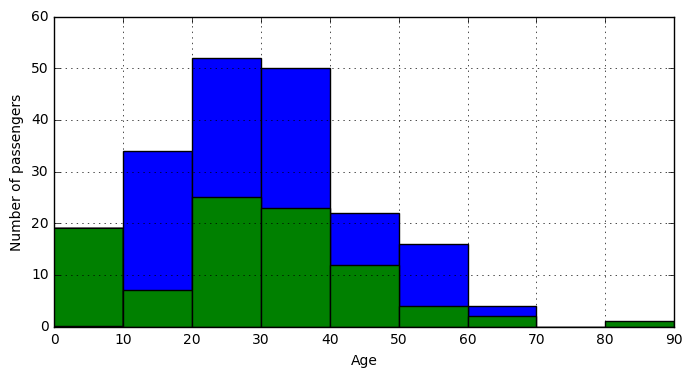

In [229]:
bins = range(0,100,10)
ax = female_survivors.hist(bins=bins, figsize = (8,4))
ax = male_survivors.hist(bins=bins)
ax.set_xlabel('Age')
ax.set_ylabel('Number of passengers')

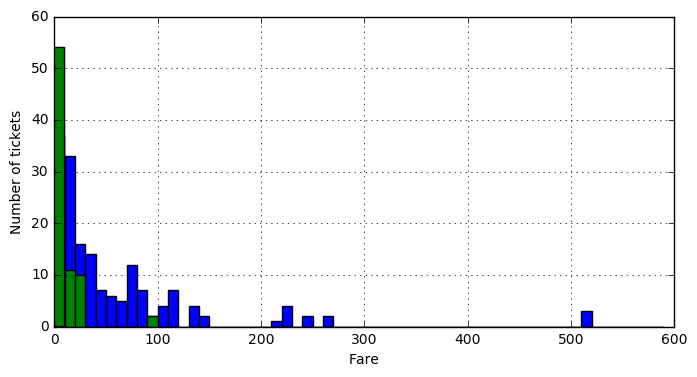

In [237]:
bins = range(0,600,10)
ax = cherbourg_fares.hist(bins=bins, figsize = (8,4))
ax = queenstown_fares.hist(bins=bins)
ax.set_xlabel('Fare')
ax.set_ylabel('Number of tickets')

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

In [240]:
survivor_fares = fares[fares['Survived']==1]['Fare']
dead_fares = fares[fares['Survived']==0]['Fare']
print(survivor_fares.mean() - dead_fares.mean())
stats.ttest_ind(a=survivor_fares,
                b=dead_fares,
                equal_var=False) 

26.277520717093292


Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

Yes, <1% significance level, 99% confidence level

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**

In [241]:
first_class = alldata[alldata['Pclass']==1]
third_class = alldata[alldata['Pclass']==3]

first_class_family = first_class['Parch'] + first_class['SibSp']
third_class_family = third_class['Parch'] + third_class['SibSp']

print(first_class_family.mean() - third_class_family.mean())
stats.ttest_ind(a=first_class_family,
                b=third_class_family,
                equal_var=False) 

-0.2349984913630534


Ttest_indResult(statistic=-2.0799075748873195, pvalue=0.037907385748521927)

No, third class families were larger on average, at 95% CI